# LEAD SCORING CASE STUDY - SHAILESH & VIVEK

### X Education wants us to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%

### Step 1 - Reading and Understanding the Data

In [529]:
#supress Warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [530]:
leads = pd.read_csv("Leads.csv")

In [531]:
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit          ...           \
0                            0                   0.0          ...            
1                          674                   2.5          ...            
2                         1532                   2.0          ...            
3                          305                   1.0          ...            
4                         1428                   1.0          ...            

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [532]:
leads.shape

(9240, 37)

In [533]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [534]:
leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

### Step 2 - Checking and removing nulls

In [535]:
leads.isnull().sum().sort_values(ascending = False)

Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
Tags                                             3353
What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Do Not Email                                        0
Do Not Call                 

#### Replacing 'Select' with nulls

In [536]:
leads = leads.replace('Select', np.nan)

In [537]:
# Checking null percentage in each columns
round(100*(leads.isnull().sum()/len(leads.index)), 2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Numbe

#### Droping columns with more 30% nulls

In [538]:
    leads = leads.drop(['Specialization', 'How did you hear about X Education', 'Tags', 
                     'Lead Quality', 'Lead Profile', 'City',
                     'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                     'Asymmetrique Profile Score'], axis=1)

round(100*(leads.isnull().sum()/len(leads.index)), 2).sort_values(ascending = False)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Last Notable Activity                             0.00
A free copy of Mastering The Interview            0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [539]:
#Checking values in 'What matters most to you in choosing a course' column
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [540]:
#Dropping 'What matters most to you in choosing a course' column as only one value is prominent and there is no variance
leads = leads.drop(['What matters most to you in choosing a course'], axis=1)
round(100*(leads.isnull().sum()/len(leads.index)), 2).sort_values(ascending = False)

What is your current occupation             29.11
Country                                     26.63
TotalVisits                                  1.48
Page Views Per Visit                         1.48
Last Activity                                1.11
Lead Source                                  0.39
A free copy of Mastering The Interview       0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
Total Time Spent on Website                  0.00
Last Notable Activity                        0.00
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00


In [541]:
#Checking values in 'What is your current occupation ' column
leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [542]:
#Dropping 'What is your current occupation ' column
leads = leads.drop(['What is your current occupation'], axis=1)

In [543]:
#Checking Country Values
leads.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
Germany                    4
Canada                     4
Nigeria                    4
South Africa               4
Sweden                     3
Netherlands                2
Italy                      2
Philippines                2
Asia/Pacific Region        2
China                      2
Uganda                     2
Belgium                    2
Bangladesh                 2
Ghana                      2
Tanzania                   1
Vietnam                    1
Sri Lanka                  1
Malaysia                   1
Kenya                      1
Denmark                    1
Russia        

In [544]:
#As above data reveals India as the prominent country. It can be dropped
leads = leads.drop(['Country'], axis=1)
round(100*(leads.isnull().sum()/len(leads.index)), 2).sort_values(ascending = False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Last Activity                               1.11
Lead Source                                 0.39
Last Notable Activity                       0.00
A free copy of Mastering The Interview      0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
Total Time Spent on Website                 0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply 

#### Converting values to Upper Case

In [545]:
leads['Lead Origin'] = leads['Lead Origin'].str.upper()
leads['Lead Source'] = leads['Lead Source'].str.upper()
leads['Last Activity'] = leads['Last Activity'].str.upper()
leads['Last Notable Activity'] = leads['Last Notable Activity'].str.upper()

#### Imputing values for nulls in remaning columns

In [546]:
# Imputing values to Total visits
leads['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [547]:
#It is clear that 0.0 is the most occuring value and it is safe to impute Nulls with '0.0' for Total Visits
leads['TotalVisits'].replace(np.nan, 0.0, inplace= True)

In [548]:
round(100*(leads.isnull().sum()/len(leads.index)), 2).sort_values(ascending = False)

Page Views Per Visit                        1.48
Last Activity                               1.11
Lead Source                                 0.39
Last Notable Activity                       0.00
A free copy of Mastering The Interview      0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 0.00
Total Time Spent on Website                 0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply 

In [549]:
# Checking Page Views per Visit Column
leads['Page Views Per Visit'].value_counts()

0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
         ... 
1.19        1
3.91        1
55.00       1
3.17        1
2.57        1
12.33       1
2.08        1
3.38        1
2.90        1
1.48        1
2.38        1
14.50       1
11.50       1
8.50        1
1.45        1
1.31        1
3.43        1
3.83        1
1.54        1
2.86        1
1.64        1
3.29        1
8.33        1
6.67        1
1.21        1
1.27        1
8.21        1
2.14        1
2.63        1
2.45        1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [550]:
#Imputing 0.0 with nulls for Page Views per Visit columns
leads['Page Views Per Visit'].replace( np.nan, 0, inplace= True)
round(100*(leads.isnull().sum()/len(leads.index)), 2).sort_values(ascending = False)

Last Activity                               1.11
Lead Source                                 0.39
Last Notable Activity                       0.00
A free copy of Mastering The Interview      0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 0.00
Total Time Spent on Website                 0.00
Page Views Per Visit                        0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply 

In [551]:
# Checking values for Last Activity
leads['Last Activity'].value_counts()

EMAIL OPENED                    3437
SMS SENT                        2745
OLARK CHAT CONVERSATION          973
PAGE VISITED ON WEBSITE          640
CONVERTED TO LEAD                428
EMAIL BOUNCED                    326
EMAIL LINK CLICKED               267
FORM SUBMITTED ON WEBSITE        116
UNREACHABLE                       93
UNSUBSCRIBED                      61
HAD A PHONE CONVERSATION          30
APPROACHED UPFRONT                 9
VIEW IN BROWSER LINK CLICKED       6
EMAIL RECEIVED                     2
EMAIL MARKED SPAM                  2
VISITED BOOTH IN TRADESHOW         1
RESUBSCRIBED TO EMAILS             1
Name: Last Activity, dtype: int64

In [552]:
# Imputing with 'EMAIL OPENED'
leads['Last Activity']=leads['Last Activity'].fillna('EMAIL OPENED')
round(100*(leads.isnull().sum()/len(leads.index)), 2).sort_values(ascending = False)

Lead Source                                 0.39
Last Notable Activity                       0.00
A free copy of Mastering The Interview      0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 0.00
Total Time Spent on Website                 0.00
Page Views Per Visit                        0.00
Last Activity                               0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply 

In [553]:
#Checking values for Lead Source
leads['Lead Source'].value_counts()

GOOGLE               2873
DIRECT TRAFFIC       2543
OLARK CHAT           1755
ORGANIC SEARCH       1154
REFERENCE             534
WELINGAK WEBSITE      142
REFERRAL SITES        125
FACEBOOK               55
BING                    6
CLICK2CALL              4
PRESS_RELEASE           2
LIVE CHAT               2
SOCIAL MEDIA            2
BLOG                    1
YOUTUBECHANNEL          1
PAY PER CLICK ADS       1
TESTONE                 1
WELEARN                 1
NC_EDM                  1
WELEARNBLOG_HOME        1
Name: Lead Source, dtype: int64

In [554]:
#Imputing
leads['Lead Source']=leads['Lead Source'].fillna('GOOGLE')
round(100*(leads.isnull().sum()/len(leads.index)), 2).sort_values(ascending = False)

Last Notable Activity                       0.0
A free copy of Mastering The Interview      0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

#### All null values are handled

### Step 3 - Visualizing Data

In [555]:
import matplotlib.pyplot as plt
import seaborn as sns

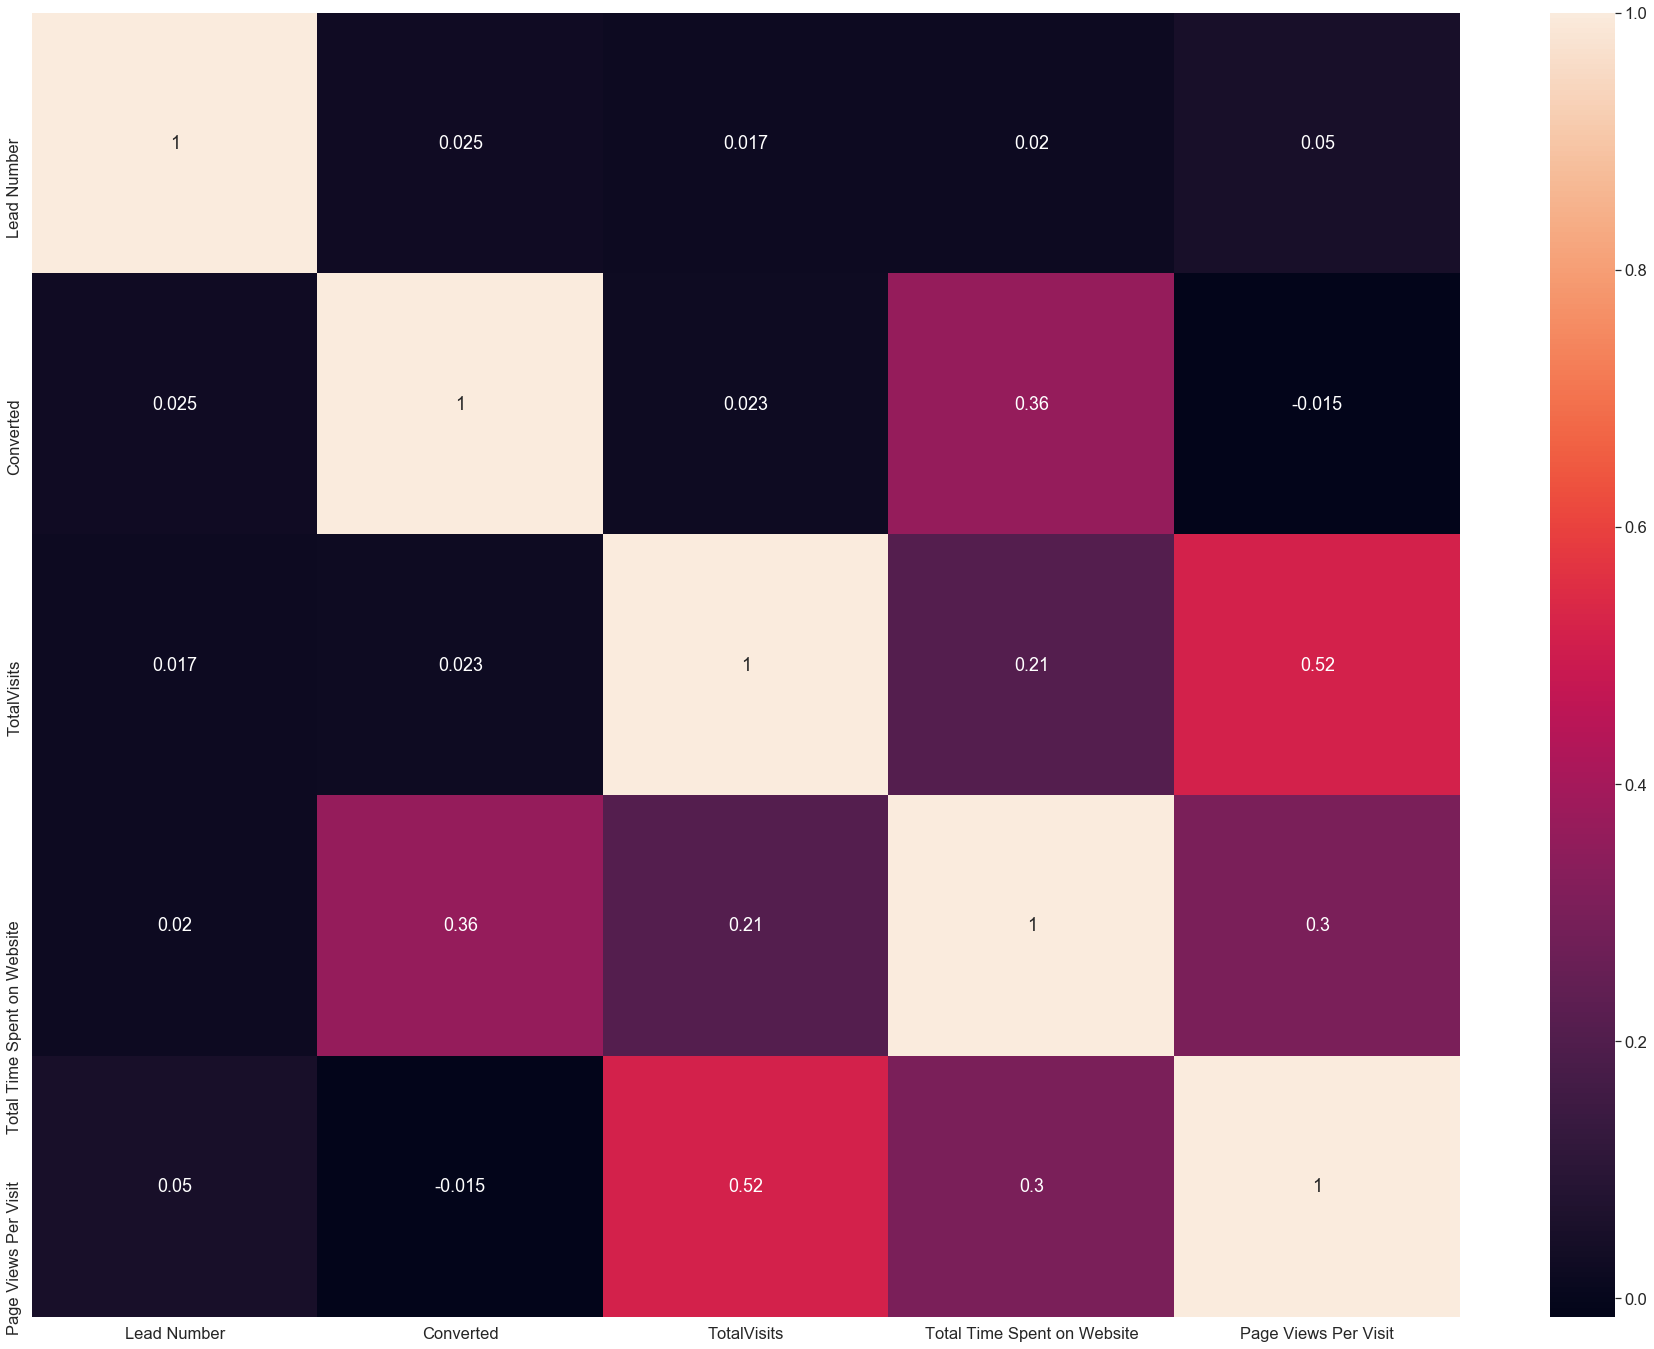

In [556]:
#checking corrleation between the variables
sns.set(font_scale=1.5)
plt.figure(figsize = (32,24))  
sns.heatmap(leads.corr(),annot = True)

[Text(0,0.5,'Leads Source'), Text(0.5,0,'Converted')]

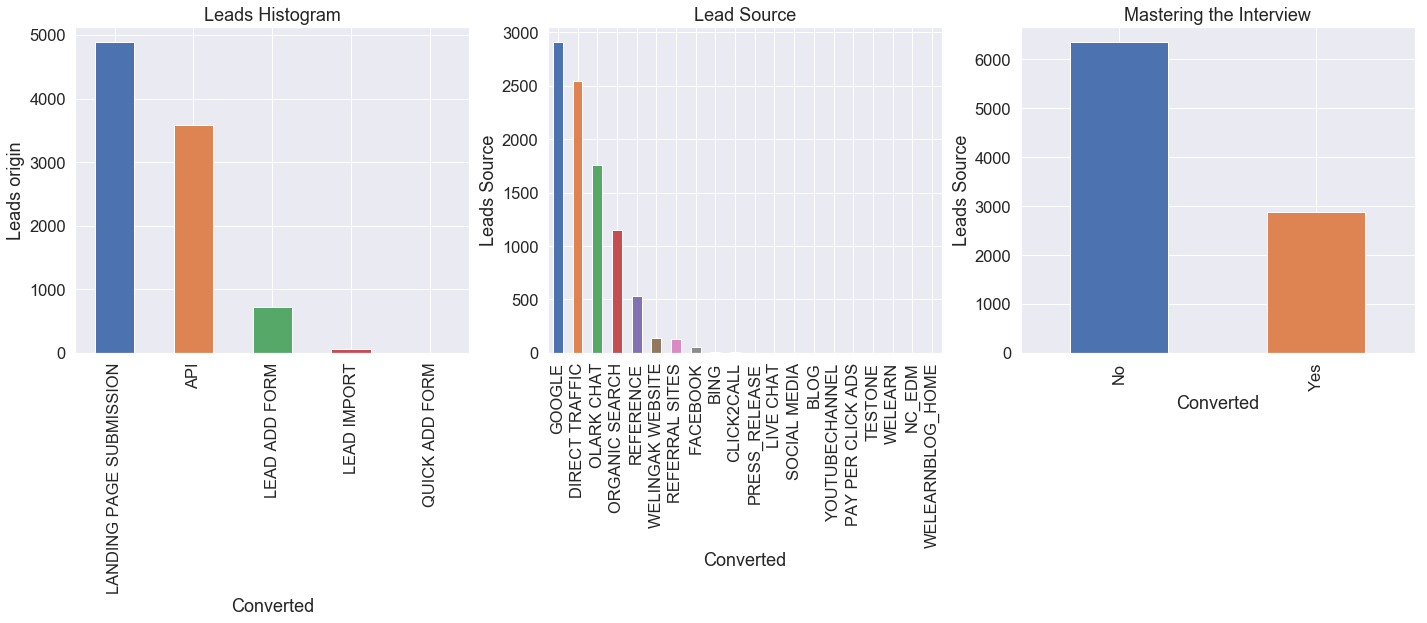

In [557]:
#Univariant Analysis
plt.figure(figsize=(24, 6))

plt.subplot(1,3,1)
plt1 = leads['Lead Origin'].value_counts().plot('bar')
plt.title('Leads Histogram')
plt1.set(xlabel = 'Converted', ylabel='Leads origin')

plt.subplot(1,3,2)
plt1 = leads['Lead Source'].value_counts().plot('bar')
plt.title('Lead Source')
plt1.set(xlabel = 'Converted', ylabel='Leads Source')

plt.subplot(1,3,3)
plt1 = leads['A free copy of Mastering The Interview'].value_counts().plot('bar')
plt.title('Mastering the Interview')
plt1.set(xlabel = 'Converted', ylabel='Leads Source')


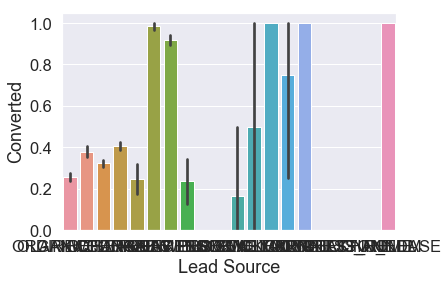

In [558]:
sns.barplot(y=leads.Converted, x=leads['Lead Source'])

### Step 4 - Outlier Treatment

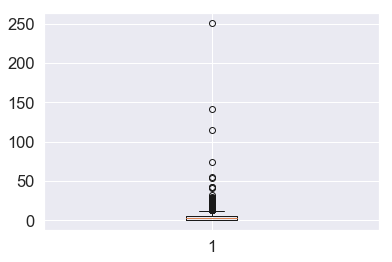

In [559]:
## Let's perform Outlier Analysis

plt.boxplot(leads['TotalVisits'])
Q1 = leads.TotalVisits.quantile(0.05)
Q3 = leads.TotalVisits.quantile(0.95)
leads = leads[(leads['TotalVisits'] <= Q3)]

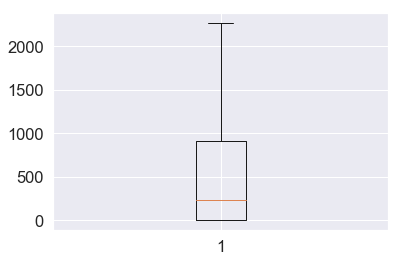

In [560]:
## Let's perform Outlier Analysis
plt.boxplot(leads['Total Time Spent on Website'])
Q1 = leads['Total Time Spent on Website'].quantile(0.05)
Q3 = leads['Total Time Spent on Website'].quantile(0.95)
leads = leads[(leads['Total Time Spent on Website'] <= Q3)]

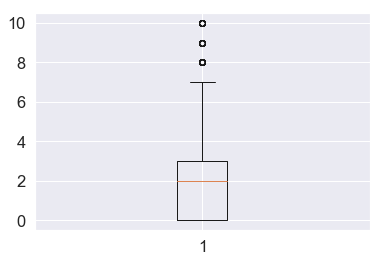

In [561]:
## Let's perform Outlier Analysis
plt.boxplot(leads['Page Views Per Visit'])
Q1 = leads['Page Views Per Visit'].quantile(0.05)
Q3 = leads['Page Views Per Visit'].quantile(0.95)


In [562]:
# Checking shape after Outlier Treatment
leads.shape

(8443, 24)

In [563]:
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  LANDING PAGE SUBMISSION   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  LANDING PAGE SUBMISSION   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  LANDING PAGE SUBMISSION   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      OLARK CHAT           No          No          0          0.0   
1  ORGANIC SEARCH           No          No          0          5.0   
2  DIRECT TRAFFIC           No          No          1          2.0   
3  DIRECT TRAFFIC           No          No          0          1.0   
4          GOOGLE           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit          ...           \
0                            0                   0.0          ...            
1                          674                   2.5          ...            
2                         1532                   2.0          ...            
3                          305                   1.0          ...            
4                         1428                   1.0          ...            

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
0                 No        No                    No                      No   
1                 No        No                    No                      No   
2                 No        No                    No                      No   
3                 No        No                    No                      No   
4                 No        No                    No                      No   

  Receive More Updates About Our Courses Update me on Supply Chain Content  \
0                                     No                                No   
1                                     No                                No   
2                                     No                                No   
3                                     No                                No   
4                                     No                                No   

  Get updates on DM Content I agree to pay the amount through cheque  \
0                        No                                       No   
1                        No                                       No   
2                        No                                       No   
3                        No                                       No   
4                        No                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              MODIFIED  
1                                     No          EMAIL OPENED  
2                                    Yes          EMAIL OPENED  
3                                     No              MODIFIED  
4                                     No              MODIFIED  

[5 rows x 24 columns]

### Step 5 - Creating Dummies

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [564]:
# Lead Origin
status = pd.get_dummies(leads['Lead Origin'], drop_first = True)
status = status.astype(float)
leads = pd.concat([leads, status], axis = 1)
leads.drop(['Lead Origin'], axis = 1, inplace = True)

# Lead Source
status = pd.get_dummies(leads['Lead Source'], drop_first = True)
status = status.astype(float)
leads = pd.concat([leads, status], axis = 1)
leads.drop(['Lead Source'], axis = 1, inplace = True)

# Last Notable Activity
status = pd.get_dummies(leads['Last Notable Activity'], drop_first = True)
status = status.astype(float)
leads = pd.concat([leads, status], axis = 1)
leads.drop(['Last Notable Activity'], axis = 1, inplace = True)

# Last Activity
status = pd.get_dummies(leads['Last Activity'], prefix='LastActivity', drop_first = True)
status = status.astype(float)
leads = pd.concat([leads, status], axis = 1)
leads.drop(['Last Activity'], axis = 1, inplace = True)

leads.head()

Prospect ID  Lead Number Do Not Email Do Not Call  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737           No          No   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728           No          No   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727           No          No   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719           No          No   
4  3256f628-e534-4826-9d63-4a8b88782852       660681           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

  Search Magazine                   ...                    \
0     No       No                   ...                     
1     No       No                   ...                     
2     No       No                   ...                     
3     No       No                   ...                     
4     No       No                   ...                     

  LastActivity_FORM SUBMITTED ON WEBSITE  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

  LastActivity_HAD A PHONE CONVERSATION LastActivity_OLARK CHAT CONVERSATION  \
0                                   0.0                                  0.0   
1                                   0.0                                  0.0   
2                                   0.0                                  0.0   
3                                   0.0                                  0.0   
4                                   0.0                                  0.0   

  LastActivity_PAGE VISITED ON WEBSITE LastActivity_RESUBSCRIBED TO EMAILS  \
0                                  1.0                                 0.0   
1                                  0.0                                 0.0   
2                                  0.0                                 0.0   
3                                  0.0                                 0.0   
4                                  0.0                                 0.0   

  LastActivity_SMS SENT LastActivity_UNREACHABLE LastActivity_UNSUBSCRIBED  \
0                   0.0                      0.0                       0.0   
1                   0.0                      0.0                       0.0   
2                   0.0                      0.0                       0.0   
3                   0.0                      1.0                       0.0   
4                   0.0                      0.0                       0.0   

  LastActivity_VIEW IN BROWSER LINK CLICKED  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

  LastActivity_VISITED BOOTH IN TRADESHOW  
0                                     0.0  
1                                     0.0  
2                                     0.0  
3                                     0.0  
4                                     0.0  

[5 rows x 73 columns]

In [565]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

DNE = pd.get_dummies(leads['Do Not Email'], prefix='DoNotEmail')
leads = pd.concat([leads, DNE], axis = 1)
leads.drop(['Do Not Email'], axis = 1, inplace = True)

DNC = pd.get_dummies(leads['Do Not Call'], prefix='DoNotCall')
leads = pd.concat([leads, DNC], axis = 1)
leads.drop(['Do Not Call'], axis = 1, inplace = True)

status = pd.get_dummies(leads['Search'], prefix='Search')
leads = pd.concat([leads, status], axis = 1)
leads.drop(['Search'], axis = 1, inplace = True)

status = pd.get_dummies(leads['Magazine'], prefix='Magazine')
leads = pd.concat([leads, status], axis = 1)
leads.drop(['Magazine'], axis = 1, inplace = True)

status = pd.get_dummies(leads['Newspaper Article'], prefix='NewspaperArticle')
leads = pd.concat([leads, status], axis = 1)
leads.drop(['Newspaper Article'], axis = 1, inplace = True)

leads.head(2)

Prospect ID  Lead Number  Converted  TotalVisits  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737          0          0.0   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728          0          5.0   

   Total Time Spent on Website  Page Views Per Visit X Education Forums  \
0                            0                   0.0                 No   
1                          674                   2.5                 No   

  Newspaper Digital Advertisement Through Recommendations  \
0        No                    No                      No   
1        No                    No                      No   

           ...          LastActivity_VISITED BOOTH IN TRADESHOW DoNotEmail_No  \
0          ...                                              0.0             1   
1          ...                                              0.0             1   

  DoNotEmail_Yes DoNotCall_No DoNotCall_Yes  Search_No  Search_Yes  \
0              0            1             0          1           0   
1              0            1             0          1           0   

   Magazine_No  NewspaperArticle_No  NewspaperArticle_Yes  
0            1                    1                     0  
1            1                    1                     0  

[2 rows x 77 columns]

In [566]:
#Continuing creating dummies for remaining columns

status = pd.get_dummies(leads['Newspaper'], prefix='Newspaper')
leads = pd.concat([leads, status], axis = 1)
leads.drop(['Newspaper'], axis = 1, inplace = True)

status = pd.get_dummies(leads['X Education Forums'], prefix='XEducationForums')
leads = pd.concat([leads, status], axis = 1)
leads.drop(['X Education Forums'], axis = 1, inplace = True)

status = pd.get_dummies(leads['Digital Advertisement'], prefix='DigitalAdvertisement')
leads = pd.concat([leads, status], axis = 1)
leads.drop(['Digital Advertisement'], axis = 1, inplace = True)

status = pd.get_dummies(leads['Through Recommendations'], prefix='ThroughRecommendations')
leads = pd.concat([leads, status], axis = 1)
leads.drop(['Through Recommendations'], axis = 1, inplace = True)

leads.head(2)

Prospect ID  Lead Number  Converted  TotalVisits  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737          0          0.0   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728          0          5.0   

   Total Time Spent on Website  Page Views Per Visit  \
0                            0                   0.0   
1                          674                   2.5   

  Receive More Updates About Our Courses Update me on Supply Chain Content  \
0                                     No                                No   
1                                     No                                No   

  Get updates on DM Content I agree to pay the amount through cheque  \
0                        No                                       No   
1                        No                                       No   

              ...             Search_Yes  Magazine_No  NewspaperArticle_No  \
0             ...                      0            1                    1   
1             ...                      0            1                    1   

   NewspaperArticle_Yes  Newspaper_No  XEducationForums_No  \
0                     0             1                    1   
1                     0             1                    1   

   DigitalAdvertisement_No  DigitalAdvertisement_Yes  \
0                        1                         0   
1                        1                         0   

   ThroughRecommendations_No  ThroughRecommendations_Yes  
0                          1                           0  
1                          1                           0  

[2 rows x 79 columns]

In [567]:
status = pd.get_dummies(leads['Receive More Updates About Our Courses'], prefix='UpdatesAboutCourses')
leads = pd.concat([leads, status], axis = 1)
leads.drop(['Receive More Updates About Our Courses'], axis = 1, inplace = True)

status = pd.get_dummies(leads['Update me on Supply Chain Content'], prefix='SupplyChainContent')
leads = pd.concat([leads, status], axis = 1)
leads.drop(['Update me on Supply Chain Content'], axis = 1, inplace = True)

status = pd.get_dummies(leads['Get updates on DM Content'], prefix='DMContent')
leads = pd.concat([leads, status], axis = 1)
leads.drop(['Get updates on DM Content'], axis = 1, inplace = True)

status = pd.get_dummies(leads['I agree to pay the amount through cheque'], prefix='Cheque')
leads = pd.concat([leads, status], axis = 1)
leads.drop(['I agree to pay the amount through cheque'], axis = 1, inplace = True)

status = pd.get_dummies(leads['A free copy of Mastering The Interview'], prefix='MasteringInterview')
leads = pd.concat([leads, status], axis = 1)
leads.drop(['A free copy of Mastering The Interview'], axis = 1, inplace = True)

leads.head(2)

Prospect ID  Lead Number  Converted  TotalVisits  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737          0          0.0   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728          0          5.0   

   Total Time Spent on Website  Page Views Per Visit  LANDING PAGE SUBMISSION  \
0                            0                   0.0                      0.0   
1                          674                   2.5                      0.0   

   LEAD ADD FORM  LEAD IMPORT  BLOG           ...            \
0            0.0          0.0   0.0           ...             
1            0.0          0.0   0.0           ...             

   DigitalAdvertisement_No  DigitalAdvertisement_Yes  \
0                        1                         0   
1                        1                         0   

   ThroughRecommendations_No  ThroughRecommendations_Yes  \
0                          1                           0   
1                          1                           0   

   UpdatesAboutCourses_No  SupplyChainContent_No  DMContent_No  Cheque_No  \
0                       1                      1             1          1   
1                       1                      1             1          1   

   MasteringInterview_No  MasteringInterview_Yes  
0                      1                       0  
1                      1                       0  

[2 rows x 80 columns]

In [568]:
#Checking Columns created
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8443 entries, 0 to 9239
Data columns (total 80 columns):
Prospect ID                                  8443 non-null object
Lead Number                                  8443 non-null int64
Converted                                    8443 non-null int64
TotalVisits                                  8443 non-null float64
Total Time Spent on Website                  8443 non-null int64
Page Views Per Visit                         8443 non-null float64
LANDING PAGE SUBMISSION                      8443 non-null float64
LEAD ADD FORM                                8443 non-null float64
LEAD IMPORT                                  8443 non-null float64
BLOG                                         8443 non-null float64
CLICK2CALL                                   8443 non-null float64
DIRECT TRAFFIC                               8443 non-null float64
FACEBOOK                                     8443 non-null float64
GOOGLE                       

In [570]:
#Checking Nulls
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                  0.0
Lead Number                                  0.0
Converted                                    0.0
TotalVisits                                  0.0
Total Time Spent on Website                  0.0
Page Views Per Visit                         0.0
LANDING PAGE SUBMISSION                      0.0
LEAD ADD FORM                                0.0
LEAD IMPORT                                  0.0
BLOG                                         0.0
CLICK2CALL                                   0.0
DIRECT TRAFFIC                               0.0
FACEBOOK                                     0.0
GOOGLE                                       0.0
LIVE CHAT                                    0.0
NC_EDM                                       0.0
OLARK CHAT                                   0.0
ORGANIC SEARCH                               0.0
PAY PER CLICK ADS                            0.0
PRESS_RELEASE                                0.0
REFERENCE           

### Step 6: Test-Train Split

In [571]:
from sklearn.model_selection import train_test_split

In [572]:
# Putting feature variable to X
X = leads.drop(['Converted','Prospect ID','Lead Number'], axis=1)

X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   LANDING PAGE SUBMISSION  LEAD ADD FORM  LEAD IMPORT  BLOG  CLICK2CALL  \
0                      0.0            0.0          0.0   0.0         0.0   
1                      0.0            0.0          0.0   0.0         0.0   
2                      1.0            0.0          0.0   0.0         0.0   
3                      1.0            0.0          0.0   0.0         0.0   
4                      1.0            0.0          0.0   0.0         0.0   

   DIRECT TRAFFIC  FACEBOOK           ...            DigitalAdvertisement_No  \
0             0.0       0.0           ...                                  1   
1             0.0       0.0           ...                                  1   
2             1.0       0.0           ...                                  1   
3             1.0       0.0           ...                                  1   
4             0.0       0.0           ...                                  1   

   DigitalAdvertisement_Yes  ThroughRecommendations_No  \
0                         0                          1   
1                         0                          1   
2                         0                          1   
3                         0                          1   
4                         0                          1   

   ThroughRecommendations_Yes  UpdatesAboutCourses_No  SupplyChainContent_No  \
0                           0                       1                      1   
1                           0                       1                      1   
2                           0                       1                      1   
3                           0                       1                      1   
4                           0                       1                      1   

   DMContent_No  Cheque_No  MasteringInterview_No  MasteringInterview_Yes  
0             1          1                      1                       0  
1             1          1                      1                       0  
2             1          1                      0                       1  
3             1          1                      1                       0  
4             1          1                      1                       0  

[5 rows x 77 columns]

In [573]:
# Putting response variable to y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [574]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 7: Feature Scaling

In [575]:
from sklearn.preprocessing import StandardScaler

In [576]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
7236     0.081699                     1.885837              0.428973   
7948    -0.730482                    -0.220972             -0.605393   
3072     0.487790                    -0.036758              0.946156   
88      -1.136573                     1.269675             -1.122576   
1545    -1.136573                    -0.862543             -1.122576   

      LANDING PAGE SUBMISSION  LEAD ADD FORM  LEAD IMPORT  BLOG  CLICK2CALL  \
7236                      1.0            0.0          0.0   0.0         0.0   
7948                      1.0            0.0          0.0   0.0         0.0   
3072                      1.0            0.0          0.0   0.0         0.0   
88                        0.0            1.0          0.0   0.0         0.0   
1545                      0.0            0.0          0.0   0.0         0.0   

      DIRECT TRAFFIC  FACEBOOK           ...            \
7236             1.0       0.0           ...             
7948             1.0       0.0           ...             
3072             1.0       0.0           ...             
88               0.0       0.0           ...             
1545             0.0       0.0           ...             

      DigitalAdvertisement_No  DigitalAdvertisement_Yes  \
7236                        1                         0   
7948                        1                         0   
3072                        1                         0   
88                          1                         0   
1545                        1                         0   

      ThroughRecommendations_No  ThroughRecommendations_Yes  \
7236                          1                           0   
7948                          1                           0   
3072                          1                           0   
88                            1                           0   
1545                          1                           0   

      UpdatesAboutCourses_No  SupplyChainContent_No  DMContent_No  Cheque_No  \
7236                       1                      1             1          1   
7948                       1                      1             1          1   
3072                       1                      1             1          1   
88                         1                      1             1          1   
1545                       1                      1             1          1   

      MasteringInterview_No  MasteringInterview_Yes  
7236                      0                       1  
7948                      1                       0  
3072                      1                       0  
88                        1                       0  
1545                      1                       0  

[5 rows x 77 columns]

In [577]:
### Checking the Coverted Rate
converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted

36.6220537723558

### Step 8: Looking at Correlations

In [578]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

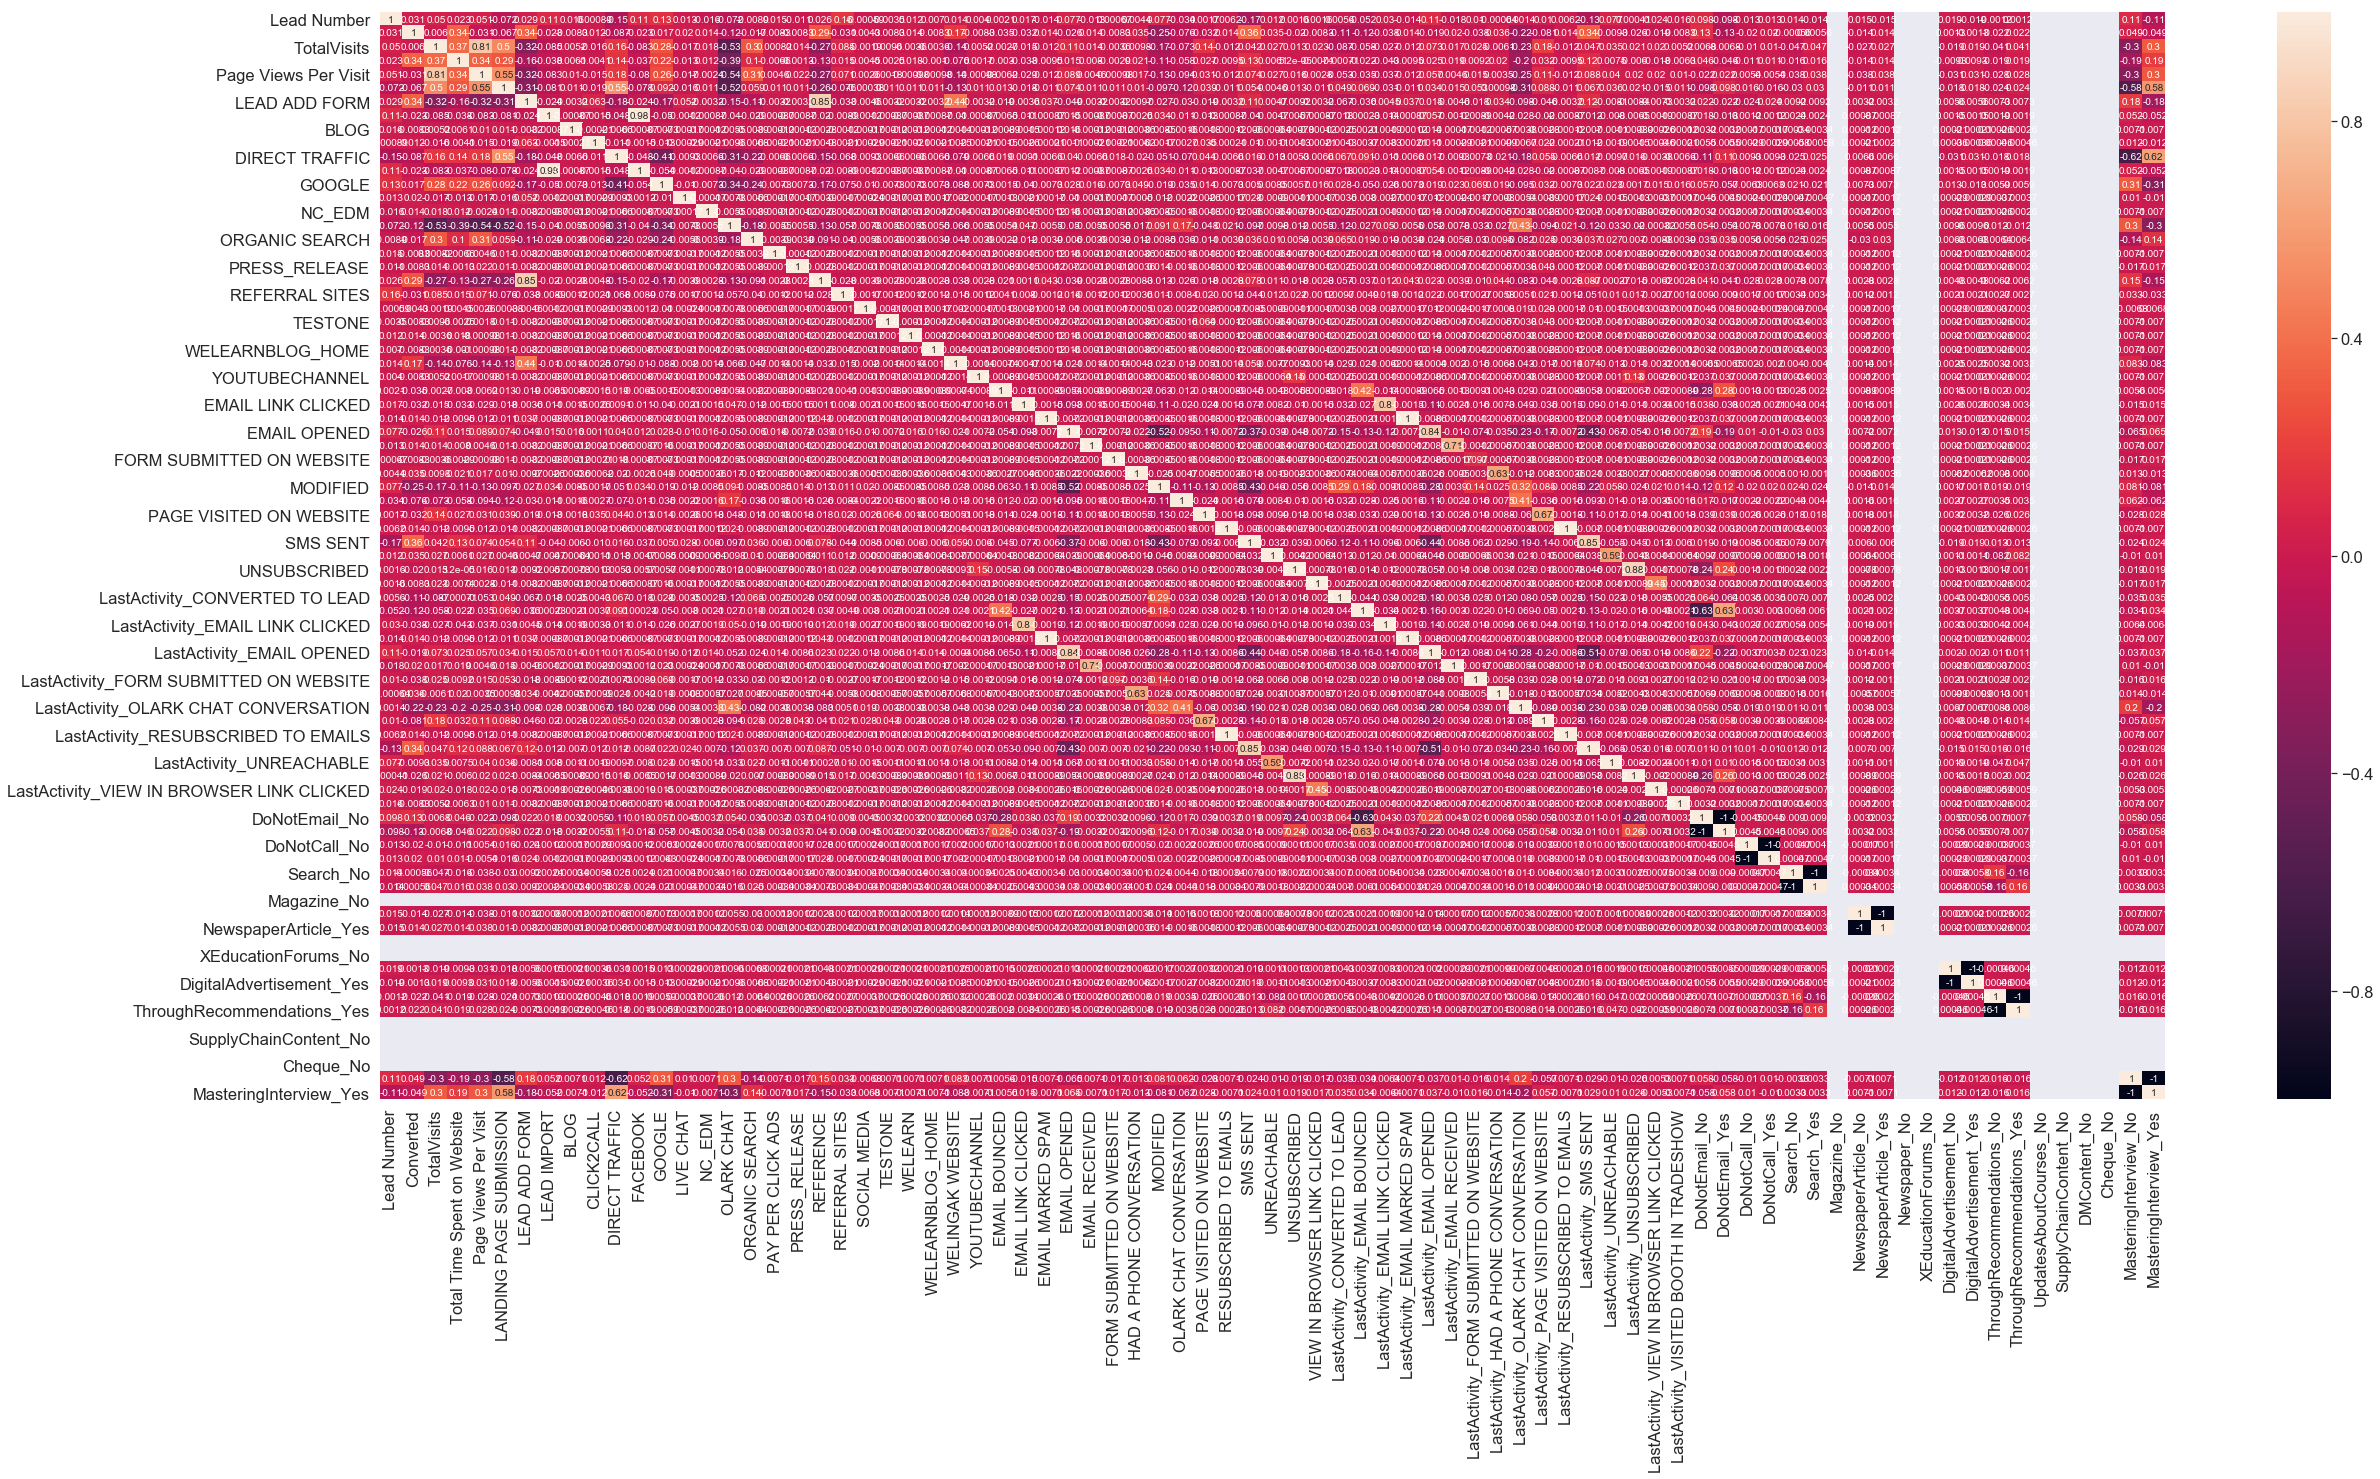

In [579]:
# Let's see the correlation matrix 
plt.figure(figsize = (40,20))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()

### Step 9: Model Building

#### Running Training Model

In [580]:
import statsmodels.api as sm

In [581]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5910
Model:                            GLM   Df Residuals:                     5856
Model Family:                Binomial   Df Model:                           53
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 10 Jun 2019   Deviance:                          nan
Time:                        13:26:27   Pearson chi2:                 5.65e+18
No. Iterations:                   100   Covariance Type:             nonrobust
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
TotalVisits                                2.746e+14   1.68e+06   1.64e+08      0.000    2.75e+14    2.75e+14
Total Time Spent on Website                1.091e+15   1.01e+06   1.08e+09      0.000    1.09e+15    1.09e+15
Page Views Per Visit                      -2.684e+14   1.66e+06  -1.62e+08      0.000   -2.68e+14   -2.68e+14
LANDING PAGE SUBMISSION                   -7.345e+13   2.85e+06  -2.58e+07      0.000   -7.35e+13   -7.35e+13
LEAD ADD FORM                               2.95e+15   1.34e+07   2.21e+08      0.000    2.95e+15    2.95e+15
LEAD IMPORT                                4.546e+14    4.8e+07   9.48e+06      0.000    4.55e+14    4.55e+14
BLOG                                      -4.598e+15   7.36e+07  -6.25e+07      0.000    -4.6e+15    -4.6e+15
CLICK2CALL                                -1.956e+15   5.78e+07  -3.38e+07      0.000   -1.96e+15   -1.96e+15
DIRECT TRAFFIC                            -3.341e+14   3.01e+07  -1.11e+07      0.000   -3.34e+14   -3.34e+14
FACEBOOK                                  -7.582e+14   5.65e+07  -1.34e+07      0.000   -7.58e+14   -7.58e+14
GOOGLE                                    -1.845e+14   3.01e+07  -6.13e+06      0.000   -1.85e+14   -1.85e+14
LIVE CHAT                                  2.825e+15   5.77e+07    4.9e+07      0.000    2.82e+15    2.82e+15
NC_EDM                                      -20.9572   3.81e-07   -5.5e+07      0.000     -20.957     -20.957
OLARK CHAT                                 9.988e+14   3.02e+07   3.31e+07      0.000    9.99e+14    9.99e+14
ORGANIC SEARCH                            -3.402e+14   3.02e+07  -1.13e+07      0.000    -3.4e+14    -3.4e+14
PAY PER CLICK ADS                          -3.16e+15   7.36e+07   -4.3e+07      0.000   -3.16e+15   -3.16e+15
PRESS_RELEASE                             -3.527e+15   7.39e+07  -4.78e+07      0.000   -3.53e+15   -3.53e+15
REFERENCE                                 -9.707e+13    3.3e+07  -2.94e+06      0.000   -9.71e+13   -9.71e+13
REFERRAL SITES                            -3.716e+14   3.13e+07  -1.19e+07      0.000   -3.72e+14   -3.72e+14
SOCIAL MEDIA                               3.881e+14   5.63e+07    6.9e+06      0.000    3.88e+14    3.88e+14
TESTONE                                      25.3546   2.41e-07   1.05e+08      0.000      25.355      25.355
WELEARN                                    3.967e+15   7.36e+07   5.39e+07      0.000    3.97e+15    3.97e+15
WELEARNBLOG_HOME                          -3.705e+15   7.36e+07  -5.04e+07      0.000    -3.7e+15    -3.7e+15
WELINGAK WEBSITE                           2.663e+15   3.34e+07   7.96e+07      0.000    2.66e+15    2.66e+15
YOUTUBECHANNEL                              -22.2312   3.22e-07  -6.89e+07      0.000     -22.231     -22.231
EMAIL BOUNCED                              -1.71e+14   1.47e+07  -1.16e+07      0.

### Step 10: Feature Selection Using RFE

In [582]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [583]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [584]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True,  True, False, False,  True, False, False, False, False,
       False,  True,  True,  True, False, False, False, False,  True,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [585]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 28),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 29),
 ('LANDING PAGE SUBMISSION', False, 40),
 ('LEAD ADD FORM', True, 1),
 ('LEAD IMPORT', False, 37),
 ('BLOG', False, 17),
 ('CLICK2CALL', False, 11),
 ('DIRECT TRAFFIC', False, 18),
 ('FACEBOOK', False, 36),
 ('GOOGLE', False, 20),
 ('LIVE CHAT', False, 46),
 ('NC_EDM', False, 61),
 ('OLARK CHAT', True, 1),
 ('ORGANIC SEARCH', False, 19),
 ('PAY PER CLICK ADS', False, 39),
 ('PRESS_RELEASE', False, 55),
 ('REFERENCE', True, 1),
 ('REFERRAL SITES', False, 21),
 ('SOCIAL MEDIA', False, 4),
 ('TESTONE', False, 57),
 ('WELEARN', False, 34),
 ('WELEARNBLOG_HOME', False, 33),
 ('WELINGAK WEBSITE', True, 1),
 ('YOUTUBECHANNEL', False, 60),
 ('EMAIL BOUNCED', False, 41),
 ('EMAIL LINK CLICKED', False, 6),
 ('EMAIL MARKED SPAM', False, 63),
 ('EMAIL OPENED', False, 10),
 ('EMAIL RECEIVED', False, 15),
 ('FORM SUBMITTED ON WEBSITE', False, 62),
 ('HAD A PHONE CONVERSATION', True, 1),
 ('M

In [586]:
col = X_train.columns[rfe.support_]

In [587]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'LANDING PAGE SUBMISSION',
       'LEAD IMPORT', 'BLOG', 'CLICK2CALL', 'DIRECT TRAFFIC', 'FACEBOOK',
       'GOOGLE', 'LIVE CHAT', 'NC_EDM', 'ORGANIC SEARCH', 'PAY PER CLICK ADS',
       'PRESS_RELEASE', 'REFERRAL SITES', 'SOCIAL MEDIA', 'TESTONE', 'WELEARN',
       'WELEARNBLOG_HOME', 'YOUTUBECHANNEL', 'EMAIL BOUNCED',
       'EMAIL LINK CLICKED', 'EMAIL MARKED SPAM', 'EMAIL OPENED',
       'EMAIL RECEIVED', 'FORM SUBMITTED ON WEBSITE', 'MODIFIED',
       'OLARK CHAT CONVERSATION', 'PAGE VISITED ON WEBSITE',
       'RESUBSCRIBED TO EMAILS', 'UNSUBSCRIBED',
       'VIEW IN BROWSER LINK CLICKED', 'LastActivity_EMAIL BOUNCED',
       'LastActivity_EMAIL LINK CLICKED', 'LastActivity_EMAIL MARKED SPAM',
       'LastActivity_EMAIL OPENED', 'LastActivity_EMAIL RECEIVED',
       'LastActivity_PAGE VISITED ON WEBSITE',
       'LastActivity_RESUBSCRIBED TO EMAILS', 'LastActivity_SMS SENT',
       'LastActivity_UNREACHABLE', 'LastActivity_VIEW IN BRO

In [588]:
col

Index(['Total Time Spent on Website', 'LEAD ADD FORM', 'OLARK CHAT',
       'REFERENCE', 'WELINGAK WEBSITE', 'HAD A PHONE CONVERSATION', 'SMS SENT',
       'UNREACHABLE', 'LastActivity_CONVERTED TO LEAD',
       'LastActivity_FORM SUBMITTED ON WEBSITE',
       'LastActivity_HAD A PHONE CONVERSATION',
       'LastActivity_OLARK CHAT CONVERSATION', 'LastActivity_UNSUBSCRIBED',
       'DoNotEmail_Yes', 'DoNotCall_No'],
      dtype='object')

##### Assessing the model with StatsModels

In [589]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5910
Model:                            GLM   Df Residuals:                     5894
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2522.7
Date:                Mon, 10 Jun 2019   Deviance:                       5045.3
Time:                        13:27:36   Pearson chi2:                 5.99e+03
No. Iterations:                    24   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     23.8126   1.47e+05      0.000      1.000   -2.89e+05    2.89e+05
Total Time Spent on Website                1.1178      0.041     27.318      0.000       1.038       1.198
LEAD ADD FORM                              3.2418      0.503      6.439      0.000       2.255       4.229
OLARK CHAT                                 1.3376      0.104     12.899      0.000       1.134       1.541
REFERENCE                                  0.7432      0.532      1.397      0.162      -0.300       1.786
WELINGAK WEBSITE                          24.0381   1.92e+04      0.001      0.999   -3.76e+04    3.77e+04
HAD A PHONE CONVERSATION                  26.3081   7.68e+04      0.000      1.000   -1.51e+05    1.51e+05
SMS SENT                                   1.6234      0.082     19.726      0.000       1.462       1.785
UNREACHABLE                                1.3859      0.549      2.523      0.012       0.309       2.462
LastActivity_CONVERTED TO LEAD            -1.0262      0.201     -5.106      0.000      -1.420      -0.632
LastActivity_FORM SUBMITTED ON WEBSITE    -0.7944      0.349     -2.277      0.023      -1.478      -0.111
LastActivity_HAD A PHONE CONVERSATION      0.3401      0.753      0.452      0.651      -1.135       1.816
LastActivity_OLARK CHAT CONVERSATION      -1.7969      0.177    -10.148      0.000      -2.144      -1.450
LastActivity_UNSUBSCRIBED                  1.1827      0.479      2.471      0.013       0.245       2.121
DoNotEmail_Yes                            -1.6864      0.185     -9.119      0.000      -2.049      -1.324
DoNotCall_No                             -25.1893   1.47e+05     -0.000      1.000   -2.89e+05    2.89e+05
==========================================================================================================
"""

In [590]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7236    0.913304
7948    0.035223
3072    0.194996
88      0.982495
1545    0.063583
473     0.149644
727     0.682817
5717    0.612732
7541    0.305540
2379    0.132729
dtype: float64

In [591]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.91330448, 0.0352232 , 0.19499621, 0.98249458, 0.06358315,
       0.14964435, 0.68281664, 0.61273209, 0.30553957, 0.13272946])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [592]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  CustID
0          1        0.913304    7236
1          0        0.035223    7948
2          1        0.194996    3072
3          1        0.982495      88
4          0        0.063583    1545

##### Creating new column 'predicted' with 1 if Converted_Prob > 0.8 else 0

In [593]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x >= 0.8 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_Prob  CustID  predicted
0          1        0.913304    7236          1
1          0        0.035223    7948          0
2          1        0.194996    3072          0
3          1        0.982495      88          1
4          0        0.063583    1545          0

In [594]:
from sklearn import metrics

In [595]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3638  102]
 [1365  805]]


In [596]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7517766497461928


#### Checking VIFs

In [597]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [598]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1                            LEAD ADD FORM  16.09
3                                REFERENCE  12.53
4                         WELINGAK WEBSITE   4.30
14                            DoNotCall_No   2.28
2                               OLARK CHAT   1.88
10   LastActivity_HAD A PHONE CONVERSATION   1.47
5                 HAD A PHONE CONVERSATION   1.46
11    LastActivity_OLARK CHAT CONVERSATION   1.44
6                                 SMS SENT   1.43
0              Total Time Spent on Website   1.29
13                          DoNotEmail_Yes   1.19
8           LastActivity_CONVERTED TO LEAD   1.11
12               LastActivity_UNSUBSCRIBED   1.09
9   LastActivity_FORM SUBMITTED ON WEBSITE   1.02
7                              UNREACHABLE   1.01

There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'PhoneService' has the highest VIF. So let's start by dropping that.

In [599]:
col = col.drop('LEAD ADD FORM', 1)
col

Index(['Total Time Spent on Website', 'OLARK CHAT', 'REFERENCE',
       'WELINGAK WEBSITE', 'HAD A PHONE CONVERSATION', 'SMS SENT',
       'UNREACHABLE', 'LastActivity_CONVERTED TO LEAD',
       'LastActivity_FORM SUBMITTED ON WEBSITE',
       'LastActivity_HAD A PHONE CONVERSATION',
       'LastActivity_OLARK CHAT CONVERSATION', 'LastActivity_UNSUBSCRIBED',
       'DoNotEmail_Yes', 'DoNotCall_No'],
      dtype='object')

In [600]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5910
Model:                            GLM   Df Residuals:                     5895
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2550.4
Date:                Mon, 10 Jun 2019   Deviance:                       5100.9
Time:                        13:29:16   Pearson chi2:                 5.98e+03
No. Iterations:                    24   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     23.8613   1.47e+05      0.000      1.000   -2.89e+05    2.89e+05
Total Time Spent on Website                1.0859      0.040     26.951      0.000       1.007       1.165
OLARK CHAT                                 1.2695      0.103     12.365      0.000       1.068       1.471
REFERENCE                                  3.9136      0.196     19.926      0.000       3.529       4.299
WELINGAK WEBSITE                          27.2028   1.92e+04      0.001      0.999   -3.77e+04    3.77e+04
HAD A PHONE CONVERSATION                  26.2763   7.72e+04      0.000      1.000   -1.51e+05    1.51e+05
SMS SENT                                   1.6488      0.082     20.143      0.000       1.488       1.809
UNREACHABLE                                1.3594      0.546      2.491      0.013       0.290       2.429
LastActivity_CONVERTED TO LEAD            -1.0381      0.200     -5.196      0.000      -1.430      -0.646
LastActivity_FORM SUBMITTED ON WEBSITE    -0.7993      0.346     -2.308      0.021      -1.478      -0.121
LastActivity_HAD A PHONE CONVERSATION      0.3359      0.747      0.450      0.653      -1.128       1.800
LastActivity_OLARK CHAT CONVERSATION      -1.7911      0.177    -10.142      0.000      -2.137      -1.445
LastActivity_UNSUBSCRIBED                  1.2047      0.473      2.548      0.011       0.278       2.131
DoNotEmail_Yes                            -1.6074      0.181     -8.887      0.000      -1.962      -1.253
DoNotCall_No                             -25.2035   1.47e+05     -0.000      1.000   -2.89e+05    2.89e+05
==========================================================================================================
"""

In [601]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [602]:
y_train_pred[:10]

array([0.91327874, 0.03956049, 0.20066352, 0.98110981, 0.06807127,
       0.15544144, 0.67699861, 0.62543448, 0.30316205, 0.13845308])

In [603]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [604]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.8 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x >= 0.8 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  CustID  predicted
0          1        0.913279    7236          1
1          0        0.039560    7948          0
2          1        0.200664    3072          0
3          1        0.981110      88          1
4          0        0.068071    1545          0

In [605]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.750253807106599


So overall the accuracy hasn't dropped much.

##### Let's check the VIFs again

In [606]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
13                            DoNotCall_No  2.27
1                               OLARK CHAT  1.88
9    LastActivity_HAD A PHONE CONVERSATION  1.47
4                 HAD A PHONE CONVERSATION  1.46
10    LastActivity_OLARK CHAT CONVERSATION  1.44
5                                 SMS SENT  1.43
0              Total Time Spent on Website  1.28
12                          DoNotEmail_Yes  1.19
2                                REFERENCE  1.16
7           LastActivity_CONVERTED TO LEAD  1.11
11               LastActivity_UNSUBSCRIBED  1.09
3                         WELINGAK WEBSITE  1.05
8   LastActivity_FORM SUBMITTED ON WEBSITE  1.02
6                              UNREACHABLE  1.01

All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [607]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3640,  100],
       [1376,  794]], dtype=int64)

In [608]:
# Actual/Predicted        not_converted    converted
        # not_converted       3640           100
        # converted           1376           794 

In [609]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.750253807106599

#### Dropping column with high p-value

In [610]:
col = col.drop('HAD A PHONE CONVERSATION', 1)
col

Index(['Total Time Spent on Website', 'OLARK CHAT', 'REFERENCE',
       'WELINGAK WEBSITE', 'SMS SENT', 'UNREACHABLE',
       'LastActivity_CONVERTED TO LEAD',
       'LastActivity_FORM SUBMITTED ON WEBSITE',
       'LastActivity_HAD A PHONE CONVERSATION',
       'LastActivity_OLARK CHAT CONVERSATION', 'LastActivity_UNSUBSCRIBED',
       'DoNotEmail_Yes', 'DoNotCall_No'],
      dtype='object')

In [611]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5910
Model:                            GLM   Df Residuals:                     5896
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2554.8
Date:                Mon, 10 Jun 2019   Deviance:                       5109.5
Time:                        13:30:38   Pearson chi2:                 6.10e+03
No. Iterations:                    23   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     22.8693   8.94e+04      0.000      1.000   -1.75e+05    1.75e+05
Total Time Spent on Website                1.0834      0.040     26.924      0.000       1.005       1.162
OLARK CHAT                                 1.2659      0.103     12.337      0.000       1.065       1.467
REFERENCE                                  3.9008      0.196     19.866      0.000       3.516       4.286
WELINGAK WEBSITE                          26.1993   1.17e+04      0.002      0.998   -2.28e+04    2.29e+04
SMS SENT                                   1.6481      0.082     20.145      0.000       1.488       1.808
UNREACHABLE                                1.3582      0.546      2.489      0.013       0.289       2.427
LastActivity_CONVERTED TO LEAD            -1.0383      0.200     -5.199      0.000      -1.430      -0.647
LastActivity_FORM SUBMITTED ON WEBSITE    -0.7988      0.346     -2.308      0.021      -1.477      -0.120
LastActivity_HAD A PHONE CONVERSATION      1.6148      0.634      2.547      0.011       0.372       2.857
LastActivity_OLARK CHAT CONVERSATION      -1.7909      0.177    -10.143      0.000      -2.137      -1.445
LastActivity_UNSUBSCRIBED                  1.2062      0.473      2.553      0.011       0.280       2.132
DoNotEmail_Yes                            -1.6094      0.181     -8.908      0.000      -1.964      -1.255
DoNotCall_No                             -24.2097   8.94e+04     -0.000      1.000   -1.75e+05    1.75e+05
==========================================================================================================
"""

In [612]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.91299615, 0.03957667, 0.2009813 , 0.98084825, 0.06797064,
       0.15579541, 0.67636406, 0.62559201, 0.30316618, 0.13881201])

In [613]:
y_train_pred_final['Converted_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x >= 0.8 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  CustID  predicted
0          1        0.912996    7236          1
1          0        0.039577    7948          0
2          1        0.200981    3072          0
3          1        0.980848      88          1
4          0        0.067971    1545          0

In [614]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7500846023688663


In [615]:
col = col.drop('DoNotCall_No', 1)
col

Index(['Total Time Spent on Website', 'OLARK CHAT', 'REFERENCE',
       'WELINGAK WEBSITE', 'SMS SENT', 'UNREACHABLE',
       'LastActivity_CONVERTED TO LEAD',
       'LastActivity_FORM SUBMITTED ON WEBSITE',
       'LastActivity_HAD A PHONE CONVERSATION',
       'LastActivity_OLARK CHAT CONVERSATION', 'LastActivity_UNSUBSCRIBED',
       'DoNotEmail_Yes'],
      dtype='object')

In [617]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5910
Model:                            GLM   Df Residuals:                     5897
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2555.8
Date:                Mon, 10 Jun 2019   Deviance:                       5111.6
Time:                        13:31:13   Pearson chi2:                 6.11e+03
No. Iterations:                    23   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.3404      0.053    -25.239      0.000      -1.444      -1.236
Total Time Spent on Website                1.0838      0.040     26.945      0.000       1.005       1.163
OLARK CHAT                                 1.2640      0.103     12.322      0.000       1.063       1.465
REFERENCE                                  3.9195      0.197     19.922      0.000       3.534       4.305
WELINGAK WEBSITE                          26.1987   1.17e+04      0.002      0.998   -2.28e+04    2.29e+04
SMS SENT                                   1.6480      0.082     20.139      0.000       1.488       1.808
UNREACHABLE                                1.3582      0.546      2.489      0.013       0.289       2.428
LastActivity_CONVERTED TO LEAD            -1.0386      0.200     -5.200      0.000      -1.430      -0.647
LastActivity_FORM SUBMITTED ON WEBSITE    -0.7993      0.346     -2.309      0.021      -1.478      -0.121
LastActivity_HAD A PHONE CONVERSATION      1.6139      0.634      2.544      0.011       0.371       2.857
LastActivity_OLARK CHAT CONVERSATION      -1.7752      0.175    -10.140      0.000      -2.118      -1.432
LastActivity_UNSUBSCRIBED                  1.2076      0.473      2.555      0.011       0.281       2.134
DoNotEmail_Yes                            -1.6108      0.181     -8.909      0.000      -1.965      -1.256
==========================================================================================================
"""

In [618]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.91306218, 0.03951907, 0.20097778, 0.98120694, 0.06773462,
       0.15577472, 0.6765619 , 0.6255986 , 0.30269168, 0.13878613])

In [619]:
y_train_pred_final['Converted_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x >= 0.8 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  CustID  predicted
0          1        0.913062    7236          1
1          0        0.039519    7948          0
2          1        0.200978    3072          0
3          1        0.981207      88          1
4          0        0.067735    1545          0

In [620]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.749746192893401


In [621]:
col = col.drop('WELINGAK WEBSITE', 1)
col

Index(['Total Time Spent on Website', 'OLARK CHAT', 'REFERENCE', 'SMS SENT',
       'UNREACHABLE', 'LastActivity_CONVERTED TO LEAD',
       'LastActivity_FORM SUBMITTED ON WEBSITE',
       'LastActivity_HAD A PHONE CONVERSATION',
       'LastActivity_OLARK CHAT CONVERSATION', 'LastActivity_UNSUBSCRIBED',
       'DoNotEmail_Yes'],
      dtype='object')

In [622]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5910
Model:                            GLM   Df Residuals:                     5898
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2715.8
Date:                Mon, 10 Jun 2019   Deviance:                       5431.5
Time:                        13:31:51   Pearson chi2:                 6.17e+03
No. Iterations:                     6   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.1714      0.050    -23.603      0.000      -1.269      -1.074
Total Time Spent on Website                0.9605      0.038     25.249      0.000       0.886       1.035
OLARK CHAT                                 0.9960      0.099     10.071      0.000       0.802       1.190
REFERENCE                                  3.6492      0.195     18.761      0.000       3.268       4.030
SMS SENT                                   1.6589      0.079     20.910      0.000       1.503       1.814
UNREACHABLE                                1.2286      0.534      2.300      0.021       0.182       2.275
LastActivity_CONVERTED TO LEAD            -1.1254      0.196     -5.756      0.000      -1.509      -0.742
LastActivity_FORM SUBMITTED ON WEBSITE    -0.8533      0.337     -2.532      0.011      -1.514      -0.193
LastActivity_HAD A PHONE CONVERSATION      1.4850      0.620      2.394      0.017       0.269       2.700
LastActivity_OLARK CHAT CONVERSATION      -1.7604      0.172    -10.253      0.000      -2.097      -1.424
LastActivity_UNSUBSCRIBED                  1.0603      0.459      2.308      0.021       0.160       1.961
DoNotEmail_Yes                            -1.5478      0.170     -9.112      0.000      -1.881      -1.215
==========================================================================================================
"""

#### All p-values are well below 0.05

In [623]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.90878487, 0.05061785, 0.23027581, 0.97581068, 0.07230796,
       0.185228  , 0.66160739, 0.66145707, 0.29998879, 0.1677977 ])

In [624]:
y_train_pred_final['Converted_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x >= 0.8 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  CustID  predicted
0          1        0.908785    7236          1
1          0        0.050618    7948          0
2          1        0.230276    3072          0
3          1        0.975811      88          1
4          0        0.072308    1545          0

In [625]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7331641285956007


In [626]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                               OLARK CHAT  1.59
8     LastActivity_OLARK CHAT CONVERSATION  1.37
0              Total Time Spent on Website  1.21
3                                 SMS SENT  1.14
10                          DoNotEmail_Yes  1.11
2                                REFERENCE  1.09
9                LastActivity_UNSUBSCRIBED  1.09
7    LastActivity_HAD A PHONE CONVERSATION  1.01
4                              UNREACHABLE  1.00
5           LastActivity_CONVERTED TO LEAD  1.00
6   LastActivity_FORM SUBMITTED ON WEBSITE  1.00

## Metrics beyond simply accuracy

In [627]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [628]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.36589861751152075

In [629]:
# Let us calculate specificity
TN / float(TN+FP)

0.9732620320855615

In [630]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.026737967914438502


In [631]:
# positive predictive value 
print (TP / float(TP+FP))

0.8881431767337807


In [632]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7256778309409888


### Step 11: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [633]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [634]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

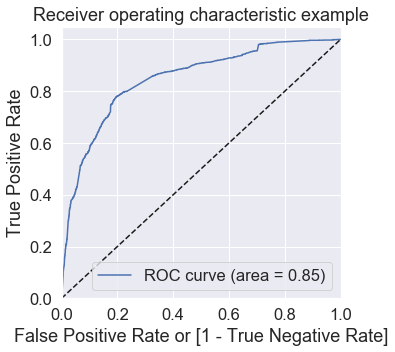

In [635]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

##### ROC Curve looks good 

### Step 12: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [636]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          1        0.908785    7236          1    1    1    1    1    1    1   
1          0        0.050618    7948          0    1    0    0    0    0    0   
2          1        0.230276    3072          0    1    1    1    0    0    0   
3          1        0.975811      88          1    1    1    1    1    1    1   
4          0        0.072308    1545          0    1    0    0    0    0    0   

   0.6  0.7  0.8  0.9  
0    1    1    1    1  
1    0    0    0    0  
2    0    0    0    0  
3    1    1    1    1  
4    0    0    0    0

In [637]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.367174  1.000000  0.000000
0.1   0.1  0.541963  0.982028  0.286631
0.2   0.2  0.690017  0.884793  0.577005
0.3   0.3  0.788156  0.788940  0.787701
0.4   0.4  0.794585  0.750230  0.820321
0.5   0.5  0.785787  0.641014  0.869786
0.6   0.6  0.781218  0.551152  0.914706
0.7   0.7  0.749577  0.393088  0.956417
0.8   0.8  0.733164  0.319816  0.972995
0.9   0.9  0.681726  0.151152  0.989572


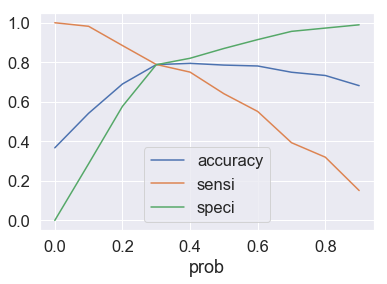

In [638]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [639]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

Converted  Converted_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          1        0.908785    7236          1    1    1    1    1    1    1   
1          0        0.050618    7948          0    1    0    0    0    0    0   
2          1        0.230276    3072          0    1    1    1    0    0    0   
3          1        0.975811      88          1    1    1    1    1    1    1   
4          0        0.072308    1545          0    1    0    0    0    0    0   

   0.6  0.7  0.8  0.9  final_predicted  
0    1    1    1    1                1  
1    0    0    0    0                0  
2    0    0    0    0                0  
3    1    1    1    1                1  
4    0    0    0    0                0

In [640]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7881556683587141

In [641]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2946,  794],
       [ 458, 1712]], dtype=int64)

In [642]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [643]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7889400921658987

In [644]:
# Let us calculate specificity
TN / float(TN+FP)

0.7877005347593583

In [645]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.21229946524064172


In [646]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6831604150039904


In [647]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8654524089306698


### Precision and recall tradeoff

In [648]:
from sklearn.metrics import precision_recall_curve

In [649]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       0
 2       1
 3       1
 4       0
 5       0
 6       1
 7       0
 8       0
 9       0
 10      0
 11      1
 12      1
 13      0
 14      1
 15      0
 16      0
 17      0
 18      0
 19      0
 20      0
 21      1
 22      0
 23      0
 24      1
 25      0
 26      0
 27      1
 28      0
 29      0
        ..
 5880    1
 5881    1
 5882    0
 5883    1
 5884    0
 5885    0
 5886    0
 5887    0
 5888    0
 5889    0
 5890    0
 5891    0
 5892    0
 5893    0
 5894    1
 5895    1
 5896    0
 5897    0
 5898    1
 5899    1
 5900    1
 5901    1
 5902    1
 5903    0
 5904    1
 5905    0
 5906    0
 5907    0
 5908    0
 5909    1
 Name: Converted, Length: 5910, dtype: int64, 0       1
 1       0
 2       0
 3       1
 4       0
 5       0
 6       0
 7       0
 8       0
 9       0
 10      1
 11      0
 12      0
 13      0
 14      1
 15      0
 16      0
 17      0
 18      0
 19      0
 20      0
 21      0
 22      0
 23      0
 24      0
 25      

In [650]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

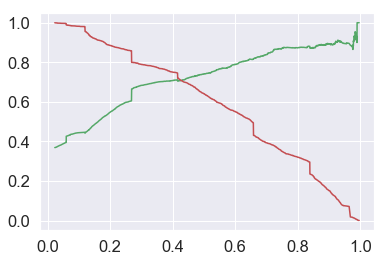

In [651]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 13: Making predictions on the test set

In [652]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [653]:
X_test = X_test[col]
X_test.head()

Total Time Spent on Website  OLARK CHAT  REFERENCE  SMS SENT  \
1894                    -0.862543         1.0        0.0       0.0   
6495                    -0.826547         0.0        0.0       0.0   
1172                     0.177098         0.0        0.0       0.0   
5218                     1.208270         0.0        0.0       0.0   
6609                    -0.434829         0.0        0.0       0.0   

      UNREACHABLE  LastActivity_CONVERTED TO LEAD  \
1894          0.0                             0.0   
6495          0.0                             0.0   
1172          0.0                             1.0   
5218          0.0                             0.0   
6609          0.0                             0.0   

      LastActivity_FORM SUBMITTED ON WEBSITE  \
1894                                     0.0   
6495                                     0.0   
1172                                     0.0   
5218                                     0.0   
6609                                     0.0   

      LastActivity_HAD A PHONE CONVERSATION  \
1894                                    0.0   
6495                                    0.0   
1172                                    0.0   
5218                                    0.0   
6609                                    0.0   

      LastActivity_OLARK CHAT CONVERSATION  LastActivity_UNSUBSCRIBED  \
1894                                   0.0                        0.0   
6495                                   0.0                        0.0   
1172                                   0.0                        0.0   
5218                                   0.0                        0.0   
6609                                   0.0                        0.0   

      DoNotEmail_Yes  
1894               0  
6495               1  
1172               0  
5218               0  
6609               0

In [654]:
X_test_sm = sm.add_constant(X_test)

In [655]:
X_test_sm.head()

const  Total Time Spent on Website  OLARK CHAT  REFERENCE  SMS SENT  \
1894    1.0                    -0.862543         1.0        0.0       0.0   
6495    1.0                    -0.826547         0.0        0.0       0.0   
1172    1.0                     0.177098         0.0        0.0       0.0   
5218    1.0                     1.208270         0.0        0.0       0.0   
6609    1.0                    -0.434829         0.0        0.0       0.0   

      UNREACHABLE  LastActivity_CONVERTED TO LEAD  \
1894          0.0                             0.0   
6495          0.0                             0.0   
1172          0.0                             1.0   
5218          0.0                             0.0   
6609          0.0                             0.0   

      LastActivity_FORM SUBMITTED ON WEBSITE  \
1894                                     0.0   
6495                                     0.0   
1172                                     0.0   
5218                                     0.0   
6609                                     0.0   

      LastActivity_HAD A PHONE CONVERSATION  \
1894                                    0.0   
6495                                    0.0   
1172                                    0.0   
5218                                    0.0   
6609                                    0.0   

      LastActivity_OLARK CHAT CONVERSATION  LastActivity_UNSUBSCRIBED  \
1894                                   0.0                        0.0   
6495                                   0.0                        0.0   
1172                                   0.0                        0.0   
5218                                   0.0                        0.0   
6609                                   0.0                        0.0   

      DoNotEmail_Yes  
1894               0  
6495               1  
1172               0  
5218               0  
6609               0

In [656]:
X_test_sm.shape

(2533, 12)

Making predictions on the test set

In [657]:
y_test_pred = res.predict(X_test_sm)

In [658]:
y_test_pred[:10]

1894    0.268164
6495    0.028940
1172    0.106529
5218    0.497284
6609    0.169509
1885    0.185228
3903    0.639887
5183    0.975080
6036    0.156289
8980    0.874678
dtype: float64

In [659]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [660]:
# Let's see the head
y_pred_1.head()

0
1894  0.268164
6495  0.028940
1172  0.106529
5218  0.497284
6609  0.169509

In [661]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [662]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [663]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [664]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [665]:
y_pred_final.head()

Converted  CustID         0
0          1    1894  0.268164
1          0    6495  0.028940
2          0    1172  0.106529
3          0    5218  0.497284
4          0    6609  0.169509

In [666]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [667]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','Converted','Converted_Prob'], axis=1)

In [668]:
# Let's see the head of y_pred_final
y_pred_final.head()

CustID  Converted  Converted_Prob
0    1894          1        0.268164
1    6495          0        0.028940
2    1172          0        0.106529
3    5218          0        0.497284
4    6609          0        0.169509

In [669]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x >= 0.8 else 0)

In [670]:
y_pred_final.head()

CustID  Converted  Converted_Prob  final_predicted
0    1894          1        0.268164                0
1    6495          0        0.028940                0
2    1172          0        0.106529                0
3    5218          0        0.497284                0
4    6609          0        0.169509                0

In [671]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7425977102250296

In [672]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1571,   40],
       [ 612,  310]], dtype=int64)

In [673]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [674]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.3362255965292842

In [675]:
# Let us calculate specificity
TN / float(TN+FP)

0.9751707014276847